<a href="https://colab.research.google.com/github/ananyadix/mental_health/blob/main/mental_health_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/mental_health.csv'

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv(path)

In [6]:
df.shape

(1259, 27)

In [9]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [10]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [11]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [16]:
df.drop(['comments'],axis=1,inplace=True)

In [17]:
df.drop(['Timestamp'],axis=1,inplace=True)

In [18]:
df.drop(['state'],axis=1,inplace=True)

In [19]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [23]:
defaultint=0
defaultstring='NaN'
defaultfloat=0.0
intfeatures=['Age']
floatfeatures=[]
stringfeatures=['Gender','Country','self_employed','family_history','treatment','work_interfere','no_employees','remote_work','tech_company','benefits','care_options',
                'wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview',
                'phys_health_interview','mental_vs_physical','obs_consequence']
for feature in df:
  if feature in intfeatures:
    df[feature]=df[feature].fillna(defaultint)
  elif feature in floatfeatures:
    df[feature]=df[feature].fillna(defaultfloat)
  elif feature in stringfeatures:
    df[feature]=df[feature].fillna(defaultstring)
  else:
    print('error feature %s is not identified',feature)

In [24]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [27]:
df['work_interfere'] = df['work_interfere'].replace([defaultstring], "Don't know" )

In [28]:
df['self_employed'] = df['self_employed'].replace([defaultstring], 'No')

In [30]:
lb=LabelEncoder()

In [35]:
df['Gender']=lb.fit_transform(df['Gender'])
df['Country']=lb.fit_transform(df['Country'])
df['self_employed']=lb.fit_transform(df['self_employed'])
df['family_history']=lb.fit_transform(df['family_history'])
df['treatment']=lb.fit_transform(df['treatment'])
df['work_interfere']=lb.fit_transform(df['work_interfere'])
df['no_employees']=lb.fit_transform(df['no_employees'])
df['remote_work']=lb.fit_transform(df['remote_work'])
df['tech_company']=lb.fit_transform(df['tech_company'])
df['benefits']=lb.fit_transform(df['benefits'])
df['care_options']=lb.fit_transform(df['care_options'])
df['wellness_program']=lb.fit_transform(df['wellness_program'])
df['seek_help']=lb.fit_transform(df['seek_help'])
df['anonymity']=lb.fit_transform(df['anonymity'])
df['leave']=lb.fit_transform(df['leave'])
df['mental_health_consequence']=lb.fit_transform(df['mental_health_consequence'])
df['phys_health_consequence']=lb.fit_transform(df['phys_health_consequence'])
df['coworkers']=lb.fit_transform(df['coworkers'])
df['supervisor']=lb.fit_transform(df['supervisor'])
df['mental_health_interview']=lb.fit_transform(df['mental_health_interview'])
df['phys_health_interview']=lb.fit_transform(df['phys_health_interview'])
df['mental_vs_physical']=lb.fit_transform(df['mental_vs_physical'])
df['obs_consequence']=lb.fit_transform(df['obs_consequence'])

In [36]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,10,45,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,16,45,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,20,7,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,20,44,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,20,45,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0


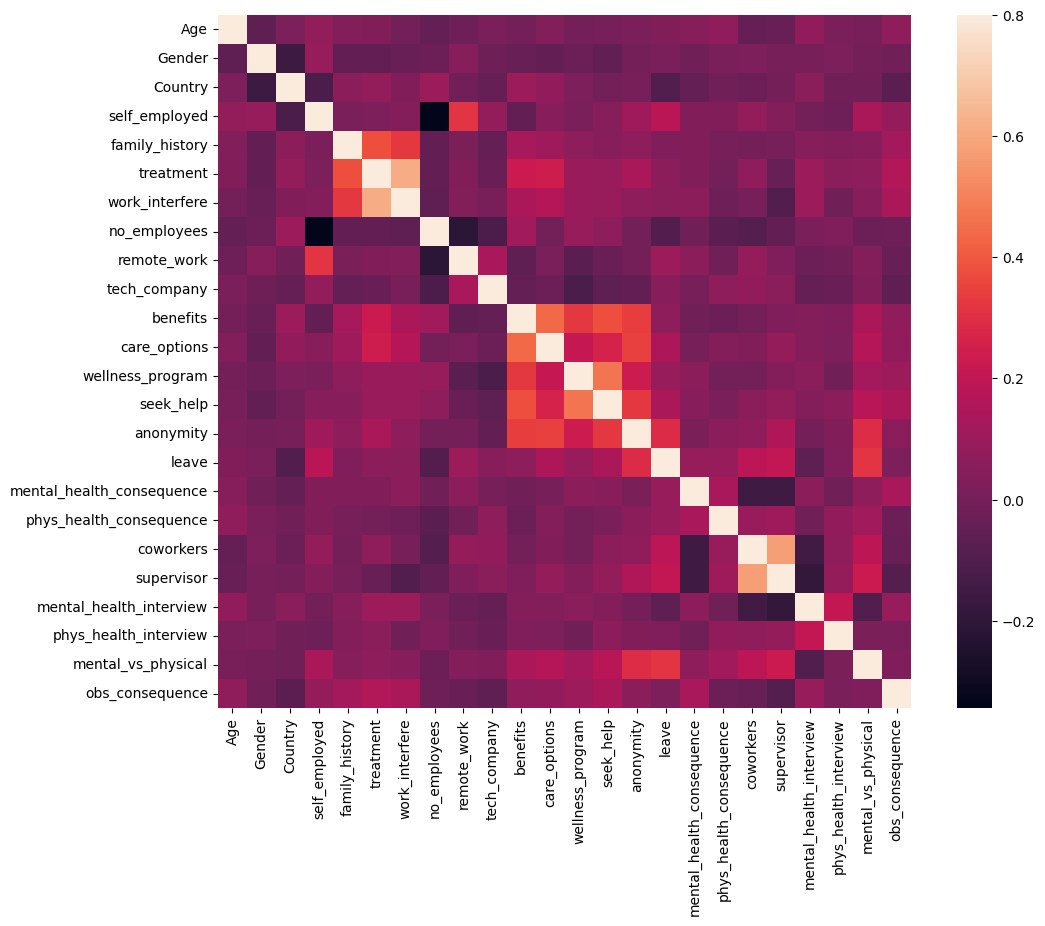

In [37]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()